In [1]:
import pandas as pd 
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding='latin 1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#### Stages of the project
- Data cleaning
- EDA
- Text preprocessing(vectorization, stemming, etc)
- Model building 
- Evaluation
- Improvement 
- Website creation 
- Deployment 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

### Step 1 : Data Cleaning 

In [8]:
df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Applying label encoder to change ham and spam to 0 and 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# checking missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# Checking duplicate values 
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
# Checking duplicate values 
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

### EDA

In [18]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

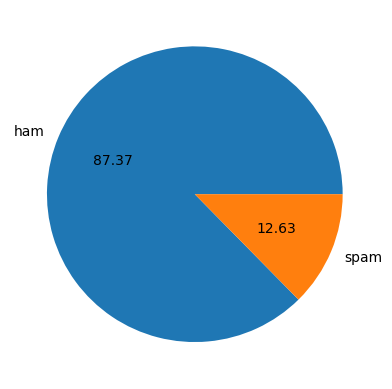

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

- 88% messages are Ham, so the data is imbalance

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
# checking describe 
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
# Analysing Ham messages 
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
# Analysing Spam messages 
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


- Mean value for Ham values of words is 70 words where as Spam is 137
- Mean words for Ham is 17 where as Spam is 27
- Mean sentences for Ham is 1.7 where as Spam is 2.9
- Clearly Ham has lesser mean compared to Spam messages 

In [28]:
# Plotting 
import seaborn as sns 


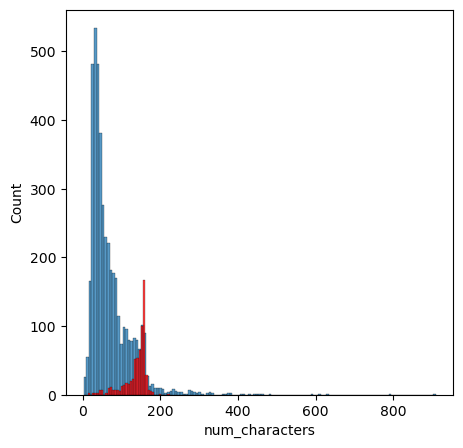

In [29]:
# Histogram for number of characters
plt.figure(figsize=(5,5))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color='red')
plt.show()

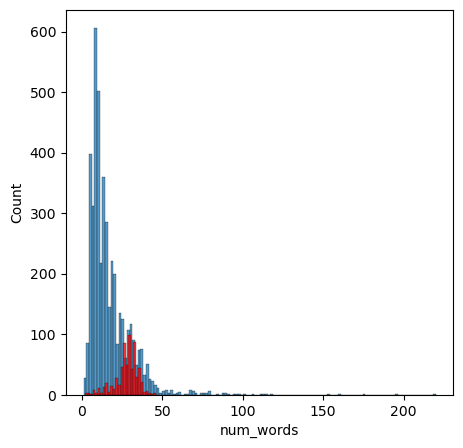

In [30]:
# Histogram for number of words
plt.figure(figsize=(5,5))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color='red')
plt.show()

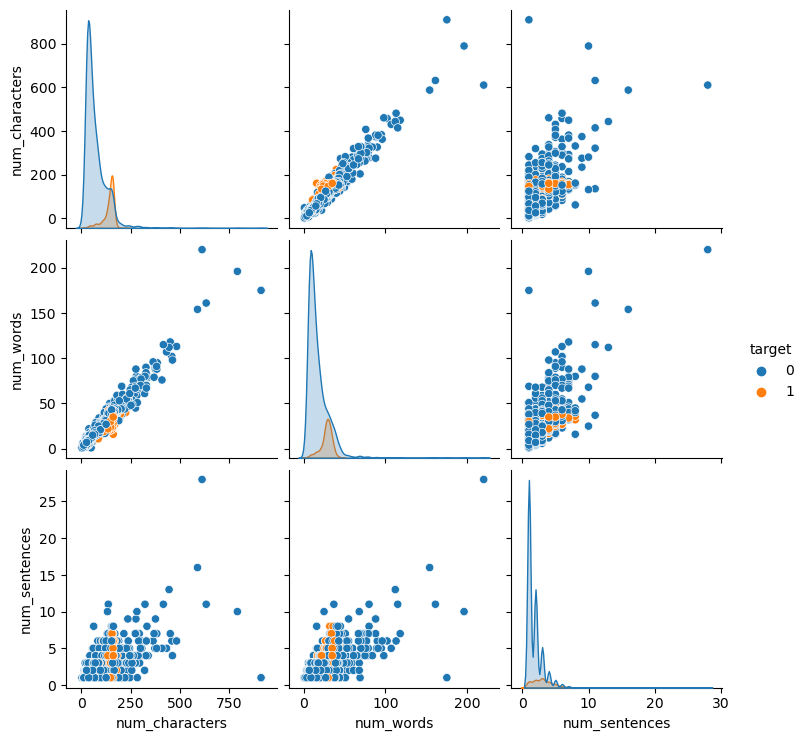

In [31]:
# USing pairplot for checking relation between all columns 
sns.pairplot(df, hue='target')

<AxesSubplot:>

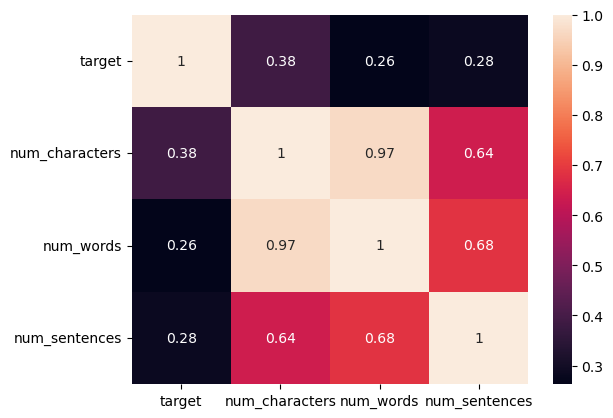

In [32]:
sns.heatmap(df.corr(), annot=True)

- High degree of correlation between columns 
- We will take only one column, i.e. num_characters 

### Data Preprocessing 
- Lower case 
- Tokenization 
- Removal of special characters 
- Removal of stopwords and punctuation 
- Stemming / Lemmatization 

In [33]:
from nltk.corpus import stopwords
stopwords.words('english')

import string
string.punctuation


# Brings the words in root form (loves, loving, loved -- love)
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
def transform_text(text):
    '''This function will take the text as return it after preprocessing 
    - Lower case 
    - Tokenization 
    - Removal of special characters 
    - Removal od stopwords and punctuations
    - Stemming '''

    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y.copy()
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]  # another way to copy
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [35]:
transform_text("I loves being @hero but?")

'love hero'

In [36]:
transform_text(df['text'][45])

'call messag miss call'

In [37]:
# Create the new column using the above function 
df['transformed_text'] = df['text'].apply(transform_text)

In [38]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height=500, min_font_size=10, background_color='white')

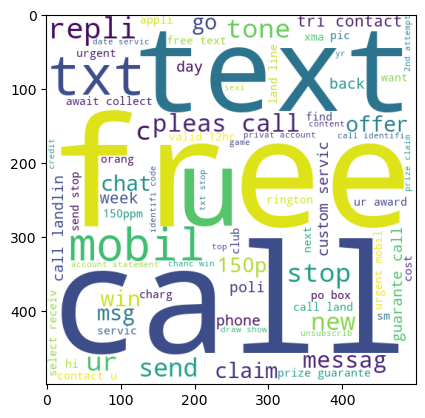

In [40]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

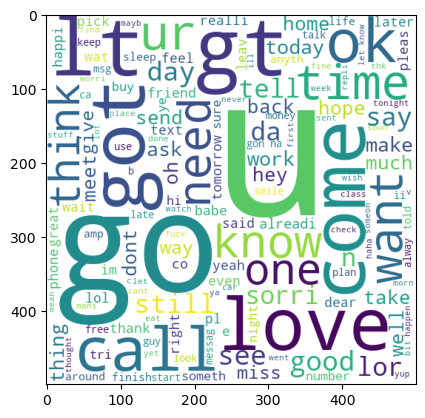

In [41]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

##### checking the top 30 words in Spam

In [42]:
 
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [43]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [44]:
len(spam_corpus)

9939

In [45]:
# Creating a dictionary of how many times a word is repeated in the list of spam_corpus
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [46]:
# Collecting the top 30 words repeated the most 
spam_corpus_top_30 = pd.DataFrame(Counter(spam_corpus).most_common(30))

In [47]:
spam_corpus_top_30

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


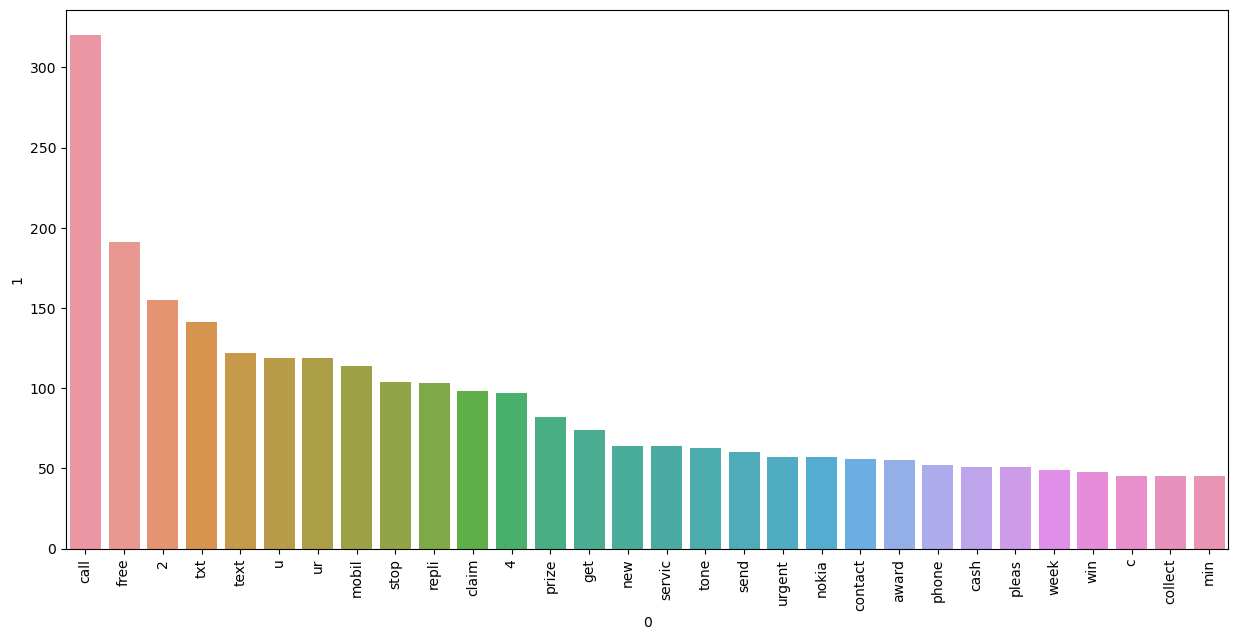

In [48]:
plt.figure(figsize=(15,7))
sns.barplot(spam_corpus_top_30[0],spam_corpus_top_30[1])
plt.xticks(rotation = 'vertical')
plt.show()

##### checking the top 30 words in Spam

In [49]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [50]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [51]:
len(ham_corpus)

35394

In [52]:
# Creating a dictionary of how many times a word is repeated in the list of ham_corpus
from collections import Counter
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [53]:
# Collecting the top 30 words repeated the most 
ham_corpus_top_30 = pd.DataFrame(Counter(ham_corpus).most_common(30))

In [54]:
ham_corpus_top_30

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


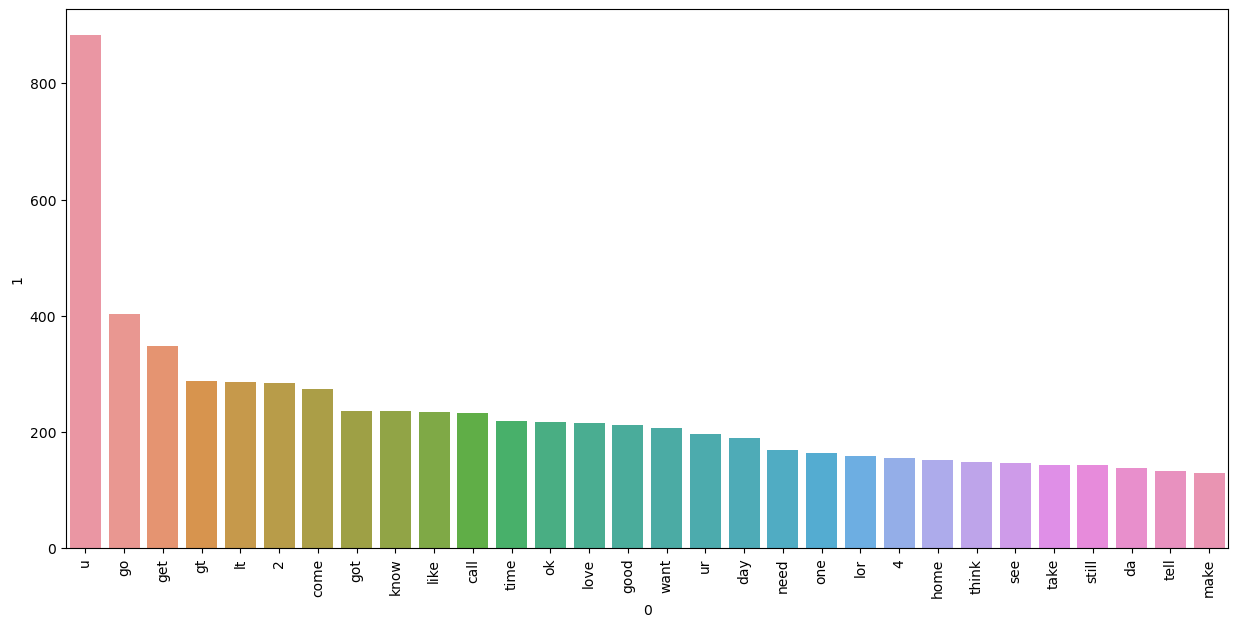

In [55]:
plt.figure(figsize=(15,7))
sns.barplot(ham_corpus_top_30[0],ham_corpus_top_30[1])
plt.xticks(rotation = 'vertical')
plt.show()

### Model Building

In [56]:
# We are going to start with Naive Base modelling as it is known for good results in textual for of data

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [57]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [58]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [59]:
X.shape

(5169, 6708)

In [60]:
y = df['target'].values

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [64]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print('accuracy score', accuracy_score(y_test, y_pred_gnb))
print('confusion matrix', confusion_matrix(y_test, y_pred_gnb))
print('precision score', precision_score(y_test, y_pred_gnb))

accuracy score 0.8800773694390716
confusion matrix [[792 104]
 [ 20 118]]
precision score 0.5315315315315315


In [65]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print('accuracy score', accuracy_score(y_test, y_pred_mnb))
print('confusion matrix', confusion_matrix(y_test, y_pred_mnb))
print('precision score', precision_score(y_test, y_pred_mnb))

accuracy score 0.9642166344294004
confusion matrix [[871  25]
 [ 12 126]]
precision score 0.8344370860927153


In [66]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print('accuracy score', accuracy_score(y_test, y_pred_bnb))
print('confusion matrix', confusion_matrix(y_test, y_pred_bnb))
print('precision score', precision_score(y_test, y_pred_bnb))

accuracy score 0.9700193423597679
confusion matrix [[893   3]
 [ 28 110]]
precision score 0.9734513274336283


- So far Bernoulli NB is performing better 
- Let's try on tfidf

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [68]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print('accuracy score', accuracy_score(y_test, y_pred_gnb))
print('confusion matrix', confusion_matrix(y_test, y_pred_gnb))
print('precision score', precision_score(y_test, y_pred_gnb))

accuracy score 0.8762088974854932
confusion matrix [[793 103]
 [ 25 113]]
precision score 0.5231481481481481


In [117]:
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
print('accuracy score', accuracy_score(y_test, y_pred_mnb))
print('confusion matrix', confusion_matrix(y_test, y_pred_mnb))
print('precision score', precision_score(y_test, y_pred_mnb))

accuracy score 0.9709864603481625
confusion matrix [[896   0]
 [ 30 108]]
precision score 1.0


In [74]:
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
print('accuracy score', accuracy_score(y_test, y_pred_bnb))
print('confusion matrix', confusion_matrix(y_test, y_pred_bnb))
print('precision score', precision_score(y_test, y_pred_bnb))

accuracy score 0.9700193423597679
confusion matrix [[893   3]
 [ 28 110]]
precision score 0.9734513274336283


- We can see that the TFIDF vectorizer is performing better on Multinomial NB as precision is 1 and accuaracy is 0.97
- Because data is imbalance so accuracy is not a good measure

In [75]:
!pip install xgboost

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [77]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [78]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [79]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [80]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    currenct_acc, currenct_pre = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print('For', name)
    print("accuracy", currenct_acc)
    print('precision', currenct_pre)
    
    accuracy_scores.append(currenct_acc)
    precision_scores.append(currenct_pre)

For SVC
accuracy 0.9729206963249516
precision 0.9741379310344828
For KN
accuracy 0.9003868471953579
precision 1.0
For NB
accuracy 0.9593810444874274
precision 1.0
For DT
accuracy 0.9352030947775629
precision 0.8380952380952381
For LR
accuracy 0.9516441005802708
precision 0.94
For RF
accuracy 0.9738878143133463
precision 1.0
For AdaBoost
accuracy 0.9613152804642167
precision 0.9454545454545454
For BgC
accuracy 0.9584139264990329
precision 0.8625954198473282
For ETC
accuracy 0.9758220502901354
precision 0.9829059829059829
For GBDT
accuracy 0.9526112185686654
precision 0.9238095238095239
For xgb
accuracy 0.9690522243713733
precision 0.9344262295081968


In [81]:
  performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [82]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


- Here we can see that RF is performing better than NB on accuracy
- KN is also giving precision 1, but accuracy is very poor
- ETC is also considerable


In [83]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm')
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.969052
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


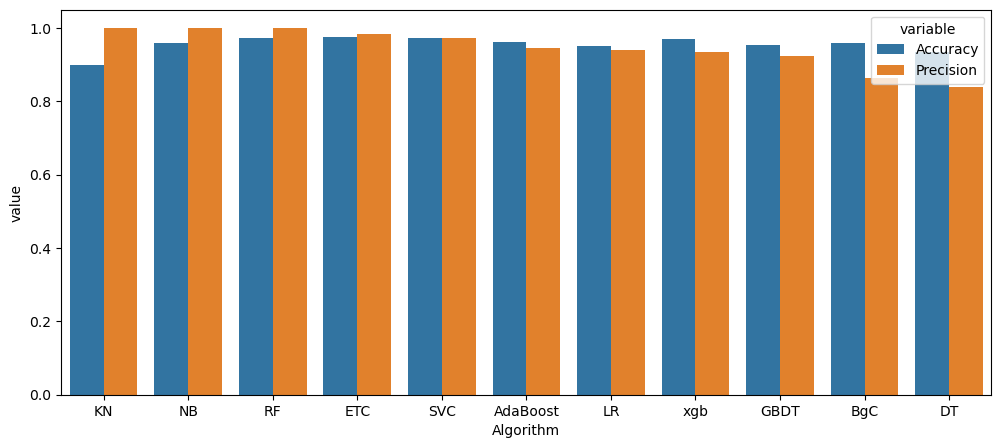

In [84]:
plt.figure(figsize=(12, 5))
sns.barplot(data = performance_df1, x='Algorithm', y='value', hue='variable')
plt.show()

### Model improvement

In [114]:
# Setting max_features of tfidf to 3000
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [115]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [88]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    currenct_acc, currenct_pre = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print('For', name)
    print("accuracy", currenct_acc)
    print('precision', currenct_pre)
    
    accuracy_scores.append(currenct_acc)
    precision_scores.append(currenct_pre)

For SVC
accuracy 0.9758220502901354
precision 0.9747899159663865
For KN
accuracy 0.9052224371373307
precision 1.0
For NB
accuracy 0.9709864603481625
precision 1.0
For DT
accuracy 0.9303675048355899
precision 0.8173076923076923
For LR
accuracy 0.9584139264990329
precision 0.9702970297029703
For RF
accuracy 0.9748549323017408
precision 0.9827586206896551
For AdaBoost
accuracy 0.960348162475822
precision 0.9292035398230089
For BgC
accuracy 0.9574468085106383
precision 0.8671875
For ETC
accuracy 0.9748549323017408
precision 0.9745762711864406
For GBDT
accuracy 0.9477756286266924
precision 0.92
For xgb
accuracy 0.971953578336557
precision 0.943089430894309


In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [90]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [91]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [92]:
new_df = performance_df.merge(temp_df, on='Algorithm')

In [93]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,xgb,0.969052,0.934426,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.947776,0.920000
9,BgC,0.958414,0.862595,0.957447,0.867188


- Can't find much difference in side by side comparision
- NB performance has increased 
- RF performance has decreased

- Lets try to scale the data and see the difference

In [94]:
from sklearn.preprocessing import MinMaxScaler  
# Didn't use std. scaler as it gives negative values as well which is not accepted by NB
scaler = MinMaxScaler()
X1 = tfidf.fit_transform(df['transformed_text']).toarray()
scaler.fit_transform(X1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=2)

In [96]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    currenct_acc, currenct_pre = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print('For', name)
    print("accuracy", currenct_acc)
    print('precision', currenct_pre)
    
    accuracy_scores.append(currenct_acc)
    precision_scores.append(currenct_pre)

For SVC
accuracy 0.9758220502901354
precision 0.9747899159663865
For KN
accuracy 0.9052224371373307
precision 1.0
For NB
accuracy 0.9709864603481625
precision 1.0
For DT
accuracy 0.9323017408123792
precision 0.8333333333333334
For LR
accuracy 0.9584139264990329
precision 0.9702970297029703
For RF
accuracy 0.9748549323017408
precision 0.9827586206896551
For AdaBoost
accuracy 0.960348162475822
precision 0.9292035398230089
For BgC
accuracy 0.9574468085106383
precision 0.8671875
For ETC
accuracy 0.9748549323017408
precision 0.9745762711864406
For GBDT
accuracy 0.9477756286266924
precision 0.92
For xgb
accuracy 0.971953578336557
precision 0.943089430894309


In [97]:
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)



In [98]:
temp_df1

,Algorithm,Accuracy_scaling,Precision_scaling
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [99]:
new_df1 = new_df.merge(temp_df1, on='Algorithm')
new_df1

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297,0.958414,0.970297
7,xgb,0.969052,0.934426,0.971954,0.943089,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000
9,BgC,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188


- There is no great difference after applying scaling 
- So we will not consider scaling 

In [100]:
# Adding number of characters
X1 = np.hstack((X1, df['num_characters'].values.reshape(-1, 1)))

In [101]:
X1

array([[  0.,   0.,   0., ...,   0.,   0., 111.],
       [  0.,   0.,   0., ...,   0.,   0.,  29.],
       [  0.,   0.,   0., ...,   0.,   0., 155.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  57.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0.,  26.]])

In [102]:
X1.shape

(5169, 3001)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=2)

In [104]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    currenct_acc, currenct_pre = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print('For', name)
    print("accuracy", currenct_acc)
    print('precision', currenct_pre)
    
    accuracy_scores.append(currenct_acc)
    precision_scores.append(currenct_pre)

For SVC
accuracy 0.8665377176015474
precision 0.0
For KN
accuracy 0.9274661508704062
precision 0.7739130434782608
For NB
accuracy 0.9410058027079303
precision 1.0
For DT
accuracy 0.9429400386847195
precision 0.8691588785046729
For LR
accuracy 0.9613152804642167
precision 0.9622641509433962
For RF
accuracy 0.9680851063829787
precision 0.981651376146789
For AdaBoost
accuracy 0.9642166344294004
precision 0.9316239316239316
For BgC
accuracy 0.9661508704061895
precision 0.8992248062015504
For ETC
accuracy 0.9806576402321083
precision 0.9758064516129032
For GBDT
accuracy 0.9516441005802708
precision 0.9313725490196079
For xgb
accuracy 0.9709864603481625
precision 0.9426229508196722


In [105]:
temp_df2 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
temp_df2

,Algorithm,Accuracy_num_chars,Precision_num_chars
2,NB,0.941006,1.000000
5,RF,0.968085,0.981651
8,ETC,0.980658,0.975806
4,LR,0.961315,0.962264
10,xgb,0.970986,0.942623
6,AdaBoost,0.964217,0.931624
9,GBDT,0.951644,0.931373
7,BgC,0.966151,0.899225
3,DT,0.942940,0.869159
1,KN,0.927466,0.773913


In [106]:
new_df2 = new_df1.merge(temp_df2, on='Algorithm')
new_df2

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,1.000000,0.927466,0.773913
1,NB,0.959381,1.000000,0.970986,1.000000,0.970986,1.000000,0.941006,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759,0.968085,0.981651
3,ETC,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576,0.980658,0.975806
4,SVC,0.972921,0.974138,0.975822,0.974790,0.975822,0.974790,0.866538,0.000000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
6,LR,0.951644,0.940000,0.958414,0.970297,0.958414,0.970297,0.961315,0.962264
7,xgb,0.969052,0.934426,0.971954,0.943089,0.971954,0.943089,0.970986,0.942623
8,GBDT,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000,0.951644,0.931373
9,BgC,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188,0.966151,0.899225


- We can see that NB performance has decreased after using the num_character column 
- In all these experiments NB is performing better, and in that tfidf max_feature 3000 without scaling is what we want to keep for further modelling 

In [107]:
# Create a voting classifier of the top 3 performing models
# Its an algorithm which is combination of best performing models
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [108]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [109]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [110]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.941972920696325
Precision 1.0


In [111]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [112]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9709864603481625
Precision 0.8802816901408451


In [118]:
import pickle 
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))